# Cardiac Arrest: Assessing the drivers of heart failure fatality
### Patricio Hernandez Senosiain 
---

## Contents:

>[1 - Introduction](#1---Introduction)
>
>[2 - Importing dependencies](#2---Importing-dependencies)
>
>[3 - Data retrieval and exploratory analysis](#3---Data-retrieval-and-exploratory-analysis)
>
>[4 - Data cleaning and preprocessing](#4---Data-cleaning-and-preprocessing)
>
>[5 - Modelling](#5---Modelling)
>
>[6 - Conclusion](#6---Conclusion)
>


## 1 - Introduction


The aim of this project will be to determine which factors increase the likelihood of a heart failure episode being fatal. To carry out this analysis we will use data belonging to heart failure patients that contains information on multiple physical characteristics (eg./ age, sex, etc.), as well as whether or not the heart failure was ultimately fatal. This project carries great significance because, although heart failure is unpredictable, knowing which factors increase a patient's chances of survival can help identify at-risk individuals and shape healthy living guidelines that decrease heart-related deaths in the long run.


## 2 - Importing dependencies


In [1]:

# Pandas and Numpy; data handling
import pandas as pd
import numpy as np

# Matplotlib and Seaborn; visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Declaring standard Seaborn color palette; visualizations
standard_palette = list(sns.color_palette('Paired')) + list(sns.color_palette('Set2'))

#Scipy and statsmodels; statistical analysis
from scipy.stats import levene
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest

# Scikit-learn; estimators
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Scikit-learn; metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

# Scikit-learn; ML pipelines
from sklearn.pipeline import Pipeline

# Scikit-learn; model and feature selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Scikit-learn; preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

# Warning disabling
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning


## 3 - Data retrieval and exploratory analysis 


>[3.1 - Retrieval](#3.1---Retrieval)
>
>[3.2 - General overview](#3.2---General-overview) - [(Notes)](#NOTES-FROM-(3.2))
>
>[3.3 - Distribution of target variable](#3.3---Distribution-of-target-variable) - [(Notes)](#NOTES-FROM-(3.3))
>
>[3.4 - Distribution of features](#3.4---Distribution-of-features) - [(Notes)](#NOTES-FROM-(3.4))
>
>[3.5 - Correlation amongst features](#3.5---Correlation-amongst-features) - [(Notes)](#NOTES-FROM-(3.5))
>
>[3.6 - Bivariate analysis of qualitative features](#3.6---Bivariate-analysis-of-qualitative-features) - [(Notes)](#NOTES-FROM-(3.6))
>
>[3.7 - Bivariate analysis of quantitative features](#3.7---Bivariate-analysis-of-quantitative-features) - [(Notes)](#NOTES-FROM-(3.7))
>



### 3.1 - Retrieval


In [2]:

# Retreiving dataset and reading into a DataFrame object
# NOTE: for dataset to be retrieved properly it must be stored 
#       in the same directory as this notebook with the original name

data = pd.read_csv('datasets_heart_failure_clinical_records_dataset.csv')



### 3.2 - General overview


In [3]:

# Inspecting first 5 records
data.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:

# Inspecting the last 5 records
data.tail()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [5]:

# General overveiw of the dataset
print('')
data.info()
print('')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB



In [6]:

# Summary statistics of dataset variables
data.describe()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


After inspecting the tables above, we can classify the variables in the dataset according to their statistical data type:

**Qualitative:**
* `anaemia`
* `diabetes`
* `high_blood_pressure`
* `sex`
* `smoking`
* `DEATH_EVENT`

**Quantitative:**
* `age`
* `creatinine_phosphokinase`
* `ejection_fraction`
* `platelets`
* `serum_creatinine`
* `serum_sodium`
* `time`



#### **NOTES FROM (3.2)**


* 13 columns: 12 features and the target variable (DEATH_EVENT)

* 299 records

* All variables correspond to numerical data types (Float64 and Int64)

* No variables appear to contain missing values (labeled as NaN, null, -1, '-' or any other convention)

* 6 qualitative variables and 7 quantitative ones

* All qualitative variables appear to be binary

* All qualitative variables are already encoded




### 3.3 - Distribution of target variable


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


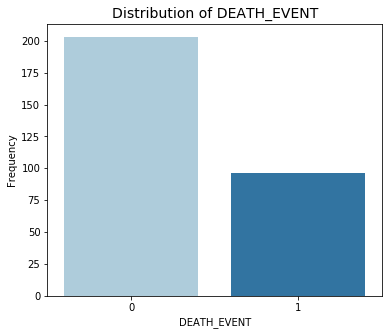

Number of fatal heart failures: 96
Number of non-fatal heart failures: 203


In [7]:

# Separating target variable
target = data['DEATH_EVENT']

# Plotting distribution of values for target variable
plt.figure(figsize=(6,5))
sns.countplot(target, palette=[standard_palette[0],standard_palette[1]])
plt.title('Distribution of DEATH_EVENT', size=14)
plt.ylabel('Frequency')
plt.show()

deaths = target.sum()
print('Number of fatal heart failures: ' +str(deaths))
print('Number of non-fatal heart failures: ' +str(299-deaths))



#### **NOTES FROM (3.3)**

* Target variable is qualitative and binary, making its prediction a classification problem

* Death occurences have nearly a 2:1 ratio (no_death:death)

* Class imbalance is unlikely to be a problem 




### 3.4 - Distribution of features


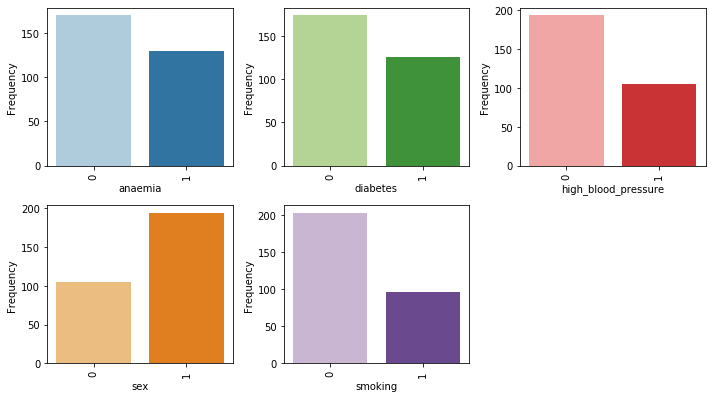

In [8]:

# Separating quantitative and qualitative features

qual_feats = data[['anaemia','diabetes', 'high_blood_pressure','sex','smoking']]

quant_feats = data.drop(columns=qual_feats.columns)
quant_feats = quant_feats.drop(columns='DEATH_EVENT')

# Plotting distribution of qualitative features

fig = plt.figure(figsize=(10,30))

for i in range(len(qual_feats.columns)):
    
    fig.add_subplot(11,3,i+1)
    sns.countplot(x=qual_feats.iloc[:,i], palette=[standard_palette[2*i],standard_palette[2*i+1]])
    plt.xticks(rotation=90)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

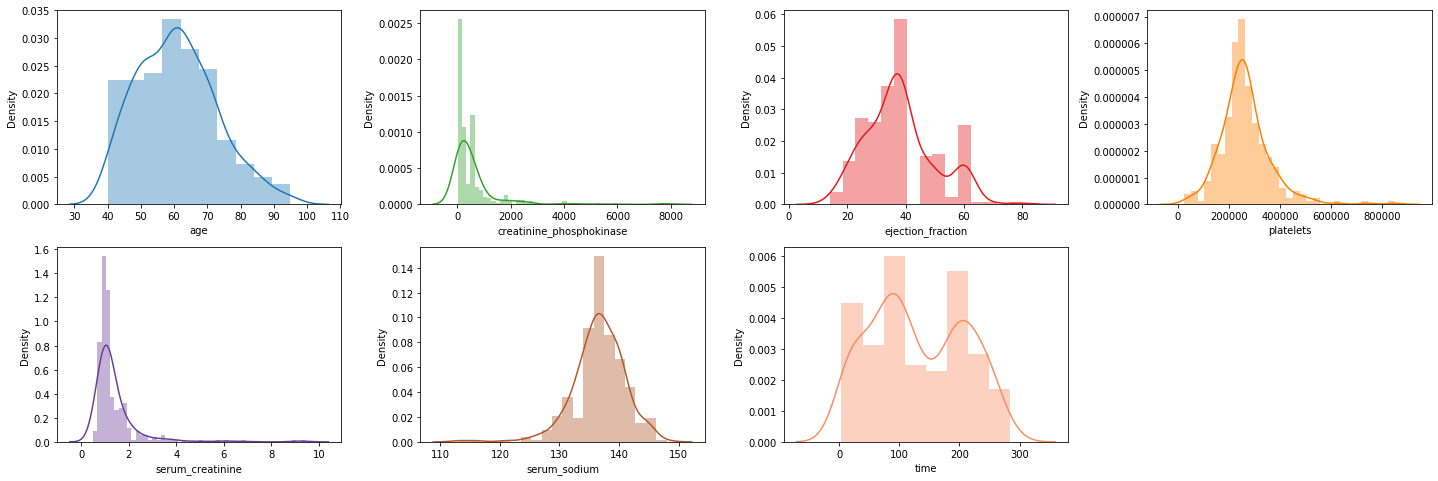

In [9]:

# Plotting distribution of quantitative variables
fig = plt.figure(figsize=(20,36))

for i in range(len(quant_feats.columns)):
    
    fig.add_subplot(11,4,i+1)
    sns.distplot(quant_feats.iloc[:,i], color=standard_palette[2*i+1])
    
plt.tight_layout()
plt.show()



#### **NOTES FROM (3.4)**


* For qualitative features, data appears to have sufficiently large sample sizes (>30 observations) for all categories 

* The following features appear to have significantly skewed distributions: `serum_creatinine`, `platelets`, and `creatinine_phosphokinase` 




### 3.5 - Correlation amongst features


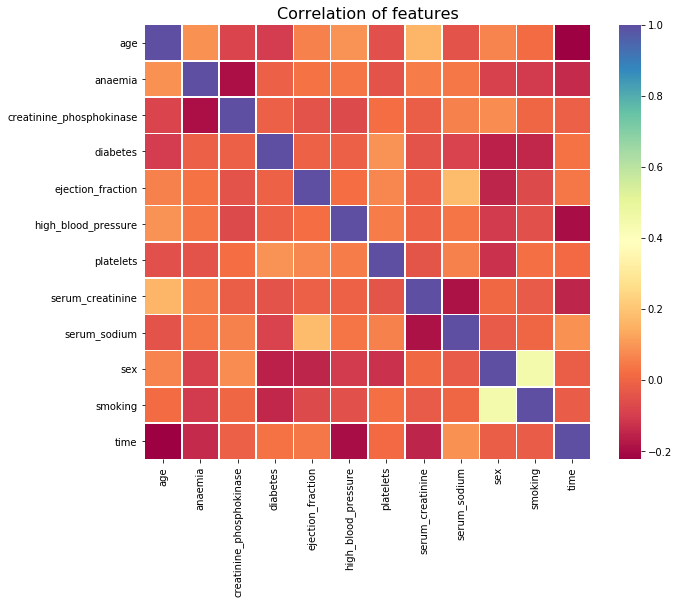

In [10]:

# Calculating correlation matrix of numerical features
feats = data.drop(columns='DEATH_EVENT')

correlations = feats.corr()

f, ax = plt.subplots(figsize=(10,8))
plt.title('Correlation of features', size=16)
sns.heatmap(correlations, cmap="Spectral", linewidths=0.5)
plt.show()


In [11]:
# Examining correlation of features with target variable
target_corr = feats.corrwith(data['DEATH_EVENT'])
target_corr = target_corr.sort_values(ascending=False)

print('Correlation of features with target variable:')
print('')

target_corr

Correlation of features with target variable:



serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964
dtype: float64


#### **NOTES FROM (3.5)**


* No features appear to be strongly correlated; multicolinearity should not be a problem.

* Features with strongest positive correlations to target variable: `serum_creatinine`,`age`,`high_blood_pressure`

* Features with strongest negative correlations to target variable: `time`,`ejection_fraction`,`serum_sodium `




### 3.6 - Bivariate analysis of qualitative features


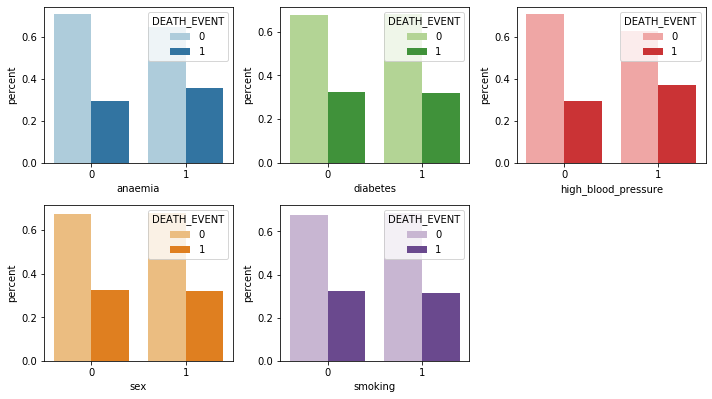

In [12]:

# Plotting proportion of DEATH_EVENT outcomes grouped by qualitative variables
fig = plt.figure(figsize=(10,30))


for i in range(len(qual_feats.columns)):
    
    var_name = qual_feats.columns[i]
    pct2 = (data.groupby([var_name,'DEATH_EVENT']).size() / data.groupby([var_name]).size()).reset_index().rename({0:'percent'}, axis=1)
    fig.add_subplot(11,3,i+1)
    sns.barplot(x=var_name, hue='DEATH_EVENT', y='percent', data=pct2, palette=[standard_palette[2*i],standard_palette[2*i+1]])

    
plt.tight_layout()
plt.show()



As seen above, there is an evident, amid slight, increase in the fatality rate for patients with anaemia and high blood pressure. Below we test for statistical significance in the difference in fatality rates for all categorical variables, taking the variable `DEATH_EVENT` to be Bernoulli distributed.

**Details of the test:**

For all qualitative features $X$:

$H_0: \Pr(DeathEvent=1 \mid X=0) = \Pr(DeathEvent=1 \mid X=1)$

$H_1: \Pr(DeathEvent=1 \mid X=0) < \Pr(DeathEvent=1 \mid X=1)$


In [13]:

# Applying difference of proportions (Z-test) of statistical significance
for var in qual_feats.columns:
    
    var_name = var
    print('Hypothesis test for {}:'.format(var_name))
    print('-----------------------')
    
    freq = (data.groupby([var_name,'DEATH_EVENT']).size()).reset_index()
    
    # We define arrays for events A(categorical_var=0) and B(categorical_var=1)
    # For each event we define two arrays: one for the frequency of success, the other for sample size
    
    sample_success_a, sample_size_a = (freq.iloc[1, 2], freq.iloc[1, 2] + freq.iloc[0, 2])
    sample_success_b, sample_size_b = (freq.iloc[3, 2], freq.iloc[3, 2]+freq.iloc[2, 2])
    
    successes = np.array([sample_success_a, sample_success_b])
    samples = np.array([sample_size_a, sample_size_b])
    
    # Hypothesis test carried out, with default H0: P(A) - P(B) = 0
    
    stat, p_value = proportions_ztest(count=successes, nobs=samples)
    
    # Reporting hypothesis test results
    print('z_stat: %0.3f p_value: %0.3f' % (stat, p_value))
    print('')
    print('')


Hypothesis test for anaemia:
-----------------------
z_stat: -1.146 p_value: 0.252


Hypothesis test for diabetes:
-----------------------
z_stat: 0.034 p_value: 0.973


Hypothesis test for high_blood_pressure:
-----------------------
z_stat: -1.372 p_value: 0.170


Hypothesis test for sex:
-----------------------
z_stat: 0.075 p_value: 0.941


Hypothesis test for smoking:
-----------------------
z_stat: 0.218 p_value: 0.827





#### **NOTES FROM (3.6)**


* No qualitative features have statistically significant associations with heart failure fatality rate




### 3.7 - Bivariate analysis of quantitative features


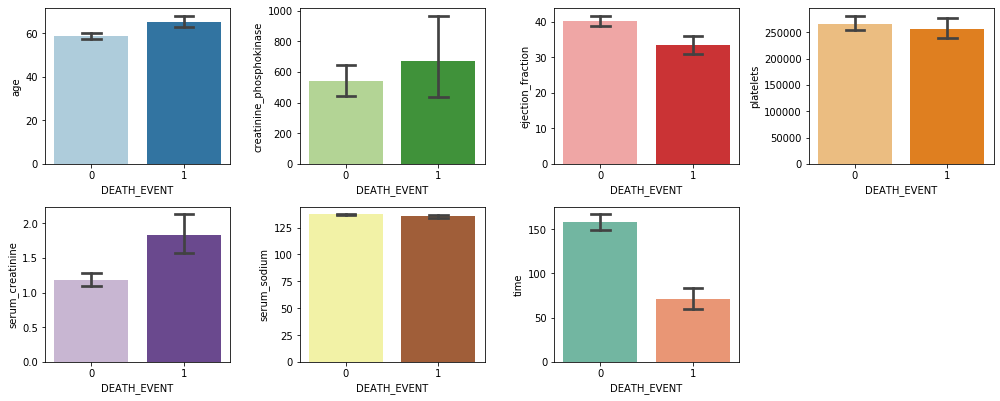

In [14]:

# Plotting bar chart for quantitative features means grouped by DEATH_EVENT outcome
fig = plt.figure(figsize=(14,30))

for i in range(len(quant_feats.columns)):
    fig.add_subplot(11, 4, i+1)
    sns.barplot(x=target,y=quant_feats.iloc[:,i],data=data, orient='v', capsize=0.2, palette=[standard_palette[2*i], standard_palette[2*i+1]])

    
plt.tight_layout()
plt.show()



After analysing the quantitative feature means (grouped by `DEATH_EVENT` outcome), we find there is a visually evident difference for nearly all variables. To expand our analysis, we produce boxplots for these features to gain a better perspective on changes to the distribution as whole after grouping.


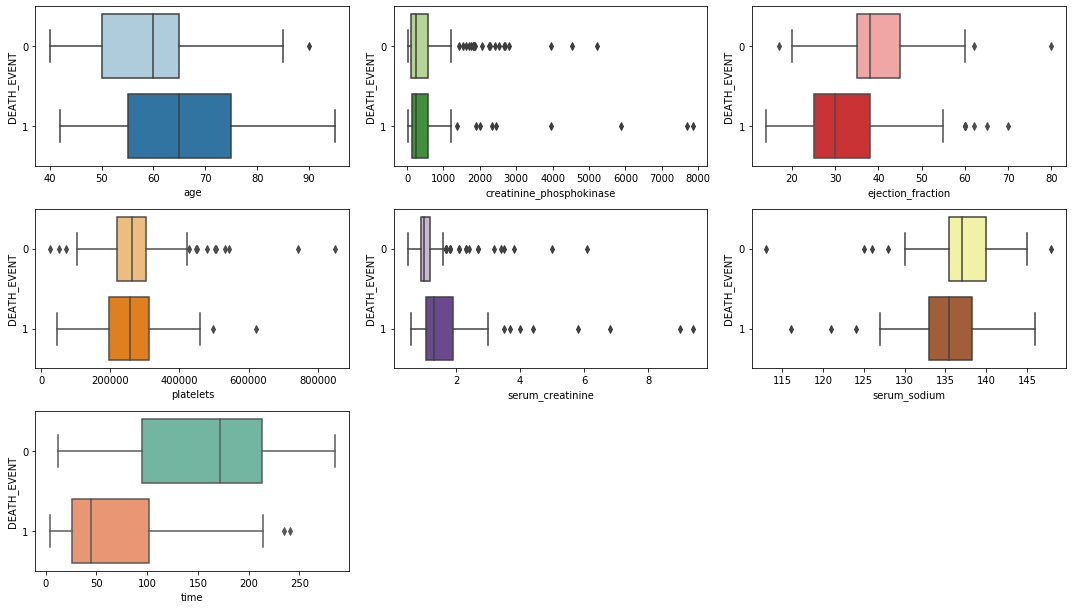

In [15]:

# Plotting boxplots of quantitative features grouped by DEATH_EVENT outcome
fig = plt.figure(figsize=(15,25))

for i in range(len(quant_feats.columns)):
    fig.add_subplot(9, 3, i+1)
    sns.boxplot(x=quant_feats.iloc[:, i], y=target, orient='h', palette=[standard_palette[2*i],standard_palette[2*i+1]])
    
plt.tight_layout()
plt.show()



Finally, we test for equality of variances between sub-samples grouped by `DEATH_EVENT` outcome for all quantitative features, and then proceed to do the appropiate difference in means statistical tests, as this can give us an indication of which features are significantly associated with the target variable.


**Details of the test:**

For all quantitative features $X$:

$H_0: \mathbb{E}[X \mid DeathEvent=0] = \mathbb{E}[X \mid DeathEvent=1]$


$H_1: \mathbb{E}[X \mid DeathEvent=0] \neq \mathbb{E}[X \mid DeathEvent=1]$


In [16]:

# Testing for equality of variances
for var in quant_feats.columns:
    print('Hypothesis test for {}:'.format(var))
    print('-----------------------')
    sample_a = data.loc[data['DEATH_EVENT']==0, var]
    sample_b = data.loc[data['DEATH_EVENT']==1, var]
    
    stat, p_value = levene(sample_a, sample_b, center='mean')
    
    # Reporting hypothesis test results
    print('Equality of variances test:')
    print('F_stat: %0.3f p_value: %0.3f' % (stat, p_value))
    print('')
    
    if p_value<0.05:
        stat, p_value = ttest_ind(sample_a, sample_b, equal_var=False)
        print('Difference in means test:')
        print('t_stat: %0.3f p_value: %0.3f' % (stat, p_value))
        
    else:
        stat, p_value =  ttest_ind(sample_a, sample_b, equal_var=True)
        print('Difference in means test:')
        print('t_stat: %0.3f p_value: %0.3f' % (stat, p_value))
    print('')
    print('')


Hypothesis test for age:
-----------------------
Equality of variances test:
F_stat: 7.311 p_value: 0.007

Difference in means test:
t_stat: -4.186 p_value: 0.000


Hypothesis test for creatinine_phosphokinase:
-----------------------
Equality of variances test:
F_stat: 3.241 p_value: 0.073

Difference in means test:
t_stat: -1.083 p_value: 0.280


Hypothesis test for ejection_fraction:
-----------------------
Equality of variances test:
F_stat: 4.379 p_value: 0.037

Difference in means test:
t_stat: 4.567 p_value: 0.000


Hypothesis test for platelets:
-----------------------
Equality of variances test:
F_stat: 0.969 p_value: 0.326

Difference in means test:
t_stat: 0.848 p_value: 0.397


Hypothesis test for serum_creatinine:
-----------------------
Equality of variances test:
F_stat: 24.231 p_value: 0.000

Difference in means test:
t_stat: -4.153 p_value: 0.000


Hypothesis test for serum_sodium:
-----------------------
Equality of variances test:
F_stat: 5.091 p_value: 0.025

Differ


#### **NOTES FROM (3.7)**


* Older individuals appear to be associated with fatal heart failure (statistically significant to 1% level)

* Individuals with a lower ejection fraction appear to be associated with fatal heart failure (statistically significant to 1% level)

* Individuals with frequent medical check-ups appear to be associated with fatal heart failure (statistically significant to 1% level)

* Individuals with high levels of serum creatinine appear to be associated with fatal heart failure (statistically significant to 1% level)

* Individuals with low levels of serum sodium appear to be associated with fatal heart failure (statistically significant to 1% level)

* `creatinine_phosphokinase` and `platelets` don't appear to have statistically significant associations with heart failure fatality



## 4 - Data cleaning and preprocessing

>[Note on cleaning and preprocessing:](#Note-on-cleaning-and-preprocessing:)
>
>[4.1 - Transforming skewed features](#4.1---Transforming-skewed-features)


### Note on cleaning and preprocessing:


After through inspection in [Section 3](#3---Data-retrieval-and-exploratory-analysis), it is evident that the quality of data is really good and very little (or no) preprocessing is needed. Below is a list of the cleaning/preprocessing steps that I noticed have already been carried out on the dataset:

* Dummy encoding for the following variables: `anaemia`, `diabetes`, `high_blood_pressure`,  `sex`, `smoking`, `DEATH_EVENT`

* Mean imputation for the following variables: `age`, `platelets`

* No missing values for any variable (corrected with aforementioned imputation and possibly record removal)


Only two additional preprocessing steps will be carried out:

1. As noted in [Section 3.4](#NOTES-FROM-(3.4)), the distribution of features is significantly skewed. In order to improve modelling, these will be log-transformed to reduce the effect of outliers on model parameter estimation.

2. Feature data might be normalized or standardized for some machine learning algorithms to improve performance. This step will be built into the model pipelines in [Section 5.2](#5.2---Pipeline-construction)



### 4.1 - Transforming skewed features


In [17]:

skewed_features = ['serum_creatinine', 'platelets', 'creatinine_phosphokinase']

# Computing skewness for features listed above

for feat in  skewed_features:
    print('{} skewness: {:.3f}'.format(feat,data[feat].skew()))
    print('')

# Log-transforming features

data[skewed_features] = np.log(data[skewed_features])

# Renaming dataset columns

data = data.rename(columns={'serum_creatinine': 'ln(serum_creatinine)', 
                            'platelets': 'ln(platelets)', 
                            'creatinine_phosphokinase': 'ln(creatinine_phosphokinase)'
                           })
skewed_features = ['ln(serum_creatinine)', 'ln(platelets)', 'ln(creatinine_phosphokinase)']

print('----------------------------')
print('')

# Computing skewness for log-transformed features

for feat in  skewed_features:
    print('{} skewness: {:.3f}'.format(feat,data[feat].skew()))
    print('')


serum_creatinine skewness: 4.456

platelets skewness: 1.462

creatinine_phosphokinase skewness: 4.463

----------------------------

ln(serum_creatinine) skewness: 1.584

ln(platelets) skewness: -1.285

ln(creatinine_phosphokinase) skewness: 0.414




#### **NOTES FROM (4.1)**


* Absolute value of skewness was reduced for all three features

## 5 - Modelling


>[5.1 - Defining metrics, feature matrix, and target vector](#5.1---Defining-metrics,-feature-matrix,-and-target-vector)
>
>[5.2 - Pipeline construction](#5.2---Pipeline-construction)
>
>[5.3 - Initial model comparison](#5.3---Initial-model-comparison) - [(Notes)](#NOTES-FROM-(5.3))
>
>[5.4 - Hyperparameter tuning](#5.4---Hyperparameter-tuning) - [(Notes)](#NOTES-FROM-(5.4))
>
>[5.5 - Final model selection,  validation, and interpretation](#5.5---Final-model-selection,-validation,-and-interpretation) - [(Notes)](#NOTES-FROM-(5.5))



### 5.1 - Defining metrics, feature matrix, and target vector

Given that the target variable in this project (`DEATH_EVENT`) is qualitative, the statistical situation that we are trying to model becomes a classification problem. Hence, we will use accuracy score as the main evaluation metric for different models tried out in this project.

Below, we define the feature matrix and target vector to be used in our modelling according to ML convention. Additionally, we split up the data into training and testing samples to be used further on in the modelling stage.


In [18]:

# Defining feature matrix
X = data.drop(columns='DEATH_EVENT')

# Defining target vector
y = data['DEATH_EVENT']

# Splitting into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)



### 5.2 - Pipeline construction

The following classification models will be tested and tuned:

- SVM classifier
- K Nearest Neighbours classifier
- Logistic regression
- Random forest clasifier

For models that utilize distance, such as Support Vector Machines or K-Nearest Neighbours, normalizing feature data before fitting improves performance drastically. Similarly, for models such as Logistic Regression, standardizing and centering data has a similar effect. Thus we incorporate these steps through a Pipeline object constructed below:


In [19]:

# Creating model pipelines

models ={'SVM': Pipeline([('scaler', Normalizer()),('model',SVC())]),
         'KNN': Pipeline( [('scaler', Normalizer()),('model',KNeighborsClassifier())]),
         'Logistic Regression':  Pipeline([('scaler', StandardScaler()),('model',LogisticRegression(solver='saga', random_state=1))]),
         'Random Forest':  Pipeline([('model',RandomForestClassifier(random_state=1))])
        }


### 5.3 - Initial model comparison

We now perform an initial evaluation of the predictive performance of each of these models on the heart failure dataset. To avoid generalizing from a simple train-test split, we use 5-fold cross validation on the training sample as it provides a more unbiased and accurate estimate of a model's performance on unseen data:


In [20]:

# Defining arrays for average model accuracy scores and training times
cv_scores = []
cv_training_times = []

for key in models:
    
    # For each cross-validated model, we print statments at the start
    #     and end of runtime to make it easier to identify errors and excessive
    #     computation times.
    
    print('Running '+ key+ ' model...')
    
    %time cv = cross_validate(models[key], X_train, y_train, cv=5)
    cv_scores.append(cv['test_score'].mean())
    cv_training_times.append(cv['fit_time'].mean())
    
    print('Finished running.')
    print('')

# Creating table that displays the name, average accuracy score, and average training time
scores = pd.DataFrame(data={'Model': list(models.keys()),
                            'Accuracy (%)': cv_scores,
                            'Average Training Time (seconds)': cv_training_times})

scores['Accuracy (%)'] = round(scores['Accuracy (%)']*100, 3)
scores = scores.set_index('Model').sort_values(by='Accuracy (%)', ascending=False)
scores


Running SVM model...
CPU times: user 60.1 ms, sys: 6.28 ms, total: 66.4 ms
Wall time: 61.3 ms
Finished running.

Running KNN model...
CPU times: user 50.4 ms, sys: 6.87 ms, total: 57.3 ms
Wall time: 52.8 ms
Finished running.

Running Logistic Regression model...
CPU times: user 48.2 ms, sys: 1.86 ms, total: 50 ms
Wall time: 50.4 ms
Finished running.

Running Random Forest model...
CPU times: user 703 ms, sys: 13.3 ms, total: 716 ms
Wall time: 721 ms
Finished running.



,Accuracy (%),Average Training Time (seconds)
Model,,
SVM,83.786,0.007516
KNN,83.298,0.005188
Random Forest,81.370,0.132211
Logistic Regression,77.503,0.006758



#### **NOTES FROM (5.3)**


* Best-performing classification model was SVM Classifier, with 83.8% accuracy

* Most time-expensive model was Random Forest (20 times more than the second-longest)



### 5.4 - Hyperparameter tuning


Next, we want to see if the performance of models used changes significantly when using optimal hyperparameters. In order to asses this, we utilize grid search cross-validation on all models, fitting with the training sample. An exception is made for the Random Forest model, as it contains far more hyperparameters than other models and is far more computationally expensive as shown in [Section 5.3](#5.3---Initial-model-comparison), making grid-search substantially time-inefficient. Instead, we utilize random search cross-validation which chooses a random sample of hyperparameter combinations and finds the optimal estimator amongst those.

Below, we specify the hyperparameters to be tuned for each models, as well as the range of values to try out for each:


In [21]:

# Hyperparameters for SVM classifier
svm_params={'model__C': np.arange(1,10,1),
           'model__gamma': [0.001, 0.002, 0.004, 0.006, 0.008, 0.01, 0.1, 1, 'scale', 'auto'] }

# Hyperparameters for KNN classifier
knn_params={'model__n_neighbors': np.arange(1,50,1),
           'model__weights': ['uniform', 'distance'],
           }

# Hyperparameters for Random Forest classifier
rf_params={'model__n_estimators': np.arange(10,210,10),
           'model__max_features': ['auto', 'sqrt','log2'],
           'model__max_depth': np.arange(1,50,1),
           'model__min_samples_split': np.arange(2,20,1),
           'model__min_samples_leaf': np.arange(1,10,1),
           'model__bootstrap': [True, False]
          }

# Hyperparameters for Logistic Regression
log_reg_params={'model__penalty': ['l1', 'l2', 'elasticnet', 'none'],
               'model__C': np.logspace(-4, 4, 20),
               'model__l1_ratio': np.linspace(0,1,21)}

model_params_grid = {'SVM': svm_params,
                     'KNN': knn_params,
                     'Logistic Regression': log_reg_params,
                     'Random Forest': rf_params}




Next, hyperparameter tuning is done using the parameter grids specified. Since some combinations of hyperparameters may trigger usage or convergence warnings, we also disable these below to avoid cluttering the console output: 



In [22]:

# Disabling Convergence and User warnings
simplefilter("ignore", category=ConvergenceWarning)
simplefilter("ignore", category=UserWarning)

# Defining array for average model accuracy scores
gscv_scores = []
model_grids = {}
for key in models:
    
    if key == 'Random Forest':
        print('Running '+ key+ ' model...')
        
        grid_search_cv = RandomizedSearchCV(models[key], model_params_grid[key], random_state=2)
        %time grid_search_cv.fit(X_train, y_train)
        
        gscv_scores.append(grid_search_cv.best_score_)
        model_grids.update({key:grid_search_cv})
        print('Best model parameters: ', grid_search_cv.best_params_)
        print('Finished running.')
        print('')
        
    else:
        print('Running '+ key+ ' model...')
        
        grid_search_cv = GridSearchCV(models[key], model_params_grid[key])
        %time grid_search_cv.fit(X_train, y_train)
        
        gscv_scores.append(grid_search_cv.best_score_)
        model_grids.update({key:grid_search_cv})
        print('Best model parameters: ', grid_search_cv.best_params_)
        print('Finished running.')
        print('')

scores = pd.DataFrame(data={'Model': list(models.keys()),
                            'Accuracy (%)': gscv_scores})

scores['Accuracy (%)'] = round(scores['Accuracy (%)']*100, 3)
scores = scores.set_index('Model').sort_values(by='Accuracy (%)', ascending=False)
scores


Running SVM model...
CPU times: user 3.59 s, sys: 21.1 ms, total: 3.61 s
Wall time: 3.63 s
Best model parameters:  {'model__C': 8, 'model__gamma': 'scale'}
Finished running.

Running KNN model...
CPU times: user 3.71 s, sys: 23.9 ms, total: 3.74 s
Wall time: 3.75 s
Best model parameters:  {'model__n_neighbors': 14, 'model__weights': 'distance'}
Finished running.

Running Logistic Regression model...
CPU times: user 1min 14s, sys: 569 ms, total: 1min 15s
Wall time: 1min 15s
Best model parameters:  {'model__C': 0.08858667904100823, 'model__l1_ratio': 0.0, 'model__penalty': 'l1'}
Finished running.

Running Random Forest model...
CPU times: user 6.09 s, sys: 76.1 ms, total: 6.16 s
Wall time: 6.2 s
Best model parameters:  {'model__n_estimators': 90, 'model__min_samples_split': 10, 'model__min_samples_leaf': 3, 'model__max_features': 'auto', 'model__max_depth': 42, 'model__bootstrap': False}
Finished running.



,Accuracy (%)
Model,
Random Forest,86.156
SVM,85.215
KNN,84.727
Logistic Regression,83.252


#### **NOTES FROM (5.4)**


* All models improved after hyperparameter tuning

* Best-performing classification model was now Random Forest, this time with 86.2% accuracy


### 5.5 - Final model selection, validation, and interpretation


After hyperparameter tuning in [Section 5.4](#5.4---Hyperparameter-tuning), we concluded that the Random Forest model had the best out-of-sample predictive performance for our dataset, but to better evaluate its shortcomings further analysis is required.

To do this, we now train the best optimized Random Forest estimator with the whole training sample and validate its predictions for the test sample. This ensures that the model is able to generalize with unseen data.


In [23]:

# Retrieving best estimator from model girds
print('')
print('Random Forest classification report:')
print('------------------------------------')
rf_final = model_grids['Random Forest'].best_estimator_

# Fitting best estimator with complete traning sample
rf_final.fit(X_train, y_train)

# Predicting on test sample
y_pred = rf_final.predict(X_test)

# Outputing classification report for 
print(classification_report(y_test, y_pred))
print('')



Random Forest classification report:
------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        64
           1       0.91      0.77      0.83        26

    accuracy                           0.91        90
   macro avg       0.91      0.87      0.89        90
weighted avg       0.91      0.91      0.91        90





In the console output above we can observe the classification report for the optimized Random Forest predictions on the test sample. With this, we can carry out a more complete assement of its predictive capabilities. Finally, we take a look at the importance that different factors take in the classification process of the optimized Random Forest model:


In [24]:

# Listing features in order of importance
feature_importance = pd.DataFrame(data={'Feature': X_train.columns,
                                        'Gini Importance': rf_final['model'].feature_importances_ 
                                       })

feature_importance = round(feature_importance, 4).set_index('Feature').sort_values(by='Gini Importance', ascending=False)
feature_importance


,Gini Importance
Feature,
time,0.4576
ln(serum_creatinine),0.1537
ejection_fraction,0.0948
serum_sodium,0.0879
age,0.0670
ln(platelets),0.0547
ln(creatinine_phosphokinase),0.0542
anaemia,0.0089
sex,0.0059



#### **NOTES FROM (5.5)**


* The accuracy score for the model's predictions is of 91%

* The F-1 score of the model is lower for DEATH_EVENT=1, meaning that the model performs worse for fatal heart failure cases

* The worst performance aspect of the model is recall for DEATH_EVENT=1, meaning that the model isn't as good at identifying cases where heart failure results in death, although this a harder task so it is expected.

* Quantitative features turned out more important for fatality prediction than qualitative ones.

* The features`time`, `ln(serum_creatinine)`, `ejection_fraction`, `serum_sodium`, and `age` were found to be the most important. All of these features had a statistically significant difference in means at a 1% level.

* Out of all quantitative features, `ln(platelets)` and `ln(creatinine_phosphokinase)` were found to be the least important. These also did not have a statistically significant difference in means.


## 6 - Conclusion



Overall, we were able to successfully explore the heart failure patients dataset and derived key insights on the subject matter. First, we discovered that the five most powerful indicators of fatality likelihood were frequent check-ups, serum creatinine levels, serum sodium levels, age, and the ejection fraction of a patient. Nevertheless, we interpret frequent check-ups as a proxy for significant health issues in a patient (that may or may not be included in the dataset) that require persistent medical attention, meaning its relationship with the heart failure fatality is non-causal. 

As for the other factors, we found that high levels of serum creatinine, low levels of serum sodium, a low ejection fraction, and an advanced age are strong indicators of potential fatality in case of heart failure, and these relationships are corroborated by modern-day medical research. In conclusion, we would recommend patients to take necessary lifestyle steps in order to avoid the above conditions, as our analysis would predict a greater likelihood of dying given a heart failure if these are present. Finally, we would also recommend any at-risk patients to get frequent medical check-ups as there are potentially many factors that weren’t included in our dataset but could be strong indicators of fatality likelihood.
